# Three radial vorticity flux components

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import cmocean

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.cursive'] = ['Helvetica-Oblique']
plt.rcParams['pdf.fonttype'] = 42

In [26]:
ds = xr.open_dataset("../lg2data.nc")

In [131]:
#------------------ calculations ------------------
ds['detadt'] = ds.eta.differentiate('valid_time', datetime_unit='s')
ds['heating'] = ds.cimf / ds.sigma

rz_range = {'r':slice(5000,200000), 'z':slice(3,47)}
dsls = ds.isel(valid_time=range(12,25)).mean('valid_time').astype('float64').sel(rz_range)
mask = dsls.Jh.isnull()
dsls = dsls.where(~mask, np.nan)

r1 = dsls.r + 5000/2 # upper bounds for r
r0 = dsls.r - 5000/2 # lower bounds for r
r0[0] = 0

detadt_vavg = (dsls.detadt * (r1**2-r0**2)).cumsum('r', keep_attrs=True) / r1**2 # volume average eta tendency
Jr = detadt_vavg*dsls.r/2 - dsls.Ja - dsls.Jh # residual flux 

In [152]:
RMW

<xarray.DataArray 'r' (z: 44)>
array([80000., 30000., 20000., 30000., 30000., 35000., 35000., 35000.,
       35000., 35000., 35000., 35000., 35000., 35000., 35000., 35000.,
       35000., 35000., 35000., 35000., 35000., 40000., 40000., 40000.,
       40000., 40000., 40000., 40000., 40000., 40000., 45000., 45000.,
       45000., 45000., 45000., 45000., 50000., 50000., 45000., 45000.,
       50000., 65000., 65000., 65000.])
Coordinates:
    r        (z) float64 8e+04 3e+04 2e+04 3e+04 ... 6.5e+04 6.5e+04 6.5e+04
    time     datetime64[ns] 2017-09-05T12:00:00
    theta    (z) float64 300.0 301.7 303.3 305.0 ... 370.0 372.5 375.0 380.0
Dimensions without coordinates: z
Attributes:
    long_name:  radius
    units:      m

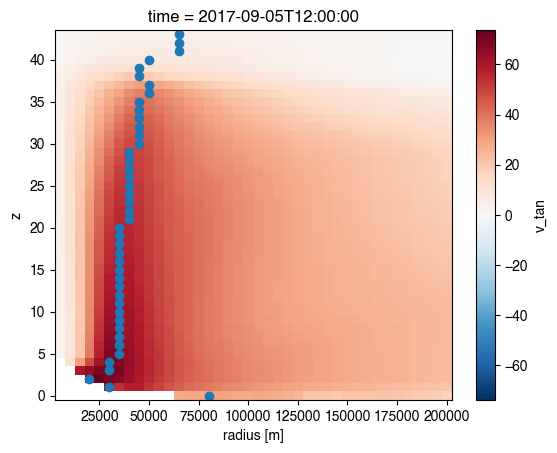

In [159]:

RMW = dsls.r.broadcast_like(dsls.v_tan).isel(r=dsls.v_tan.argmax('r'))
p = dsls.v_tan.plot()
p.axes.scatter(RMW,RMW.z)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


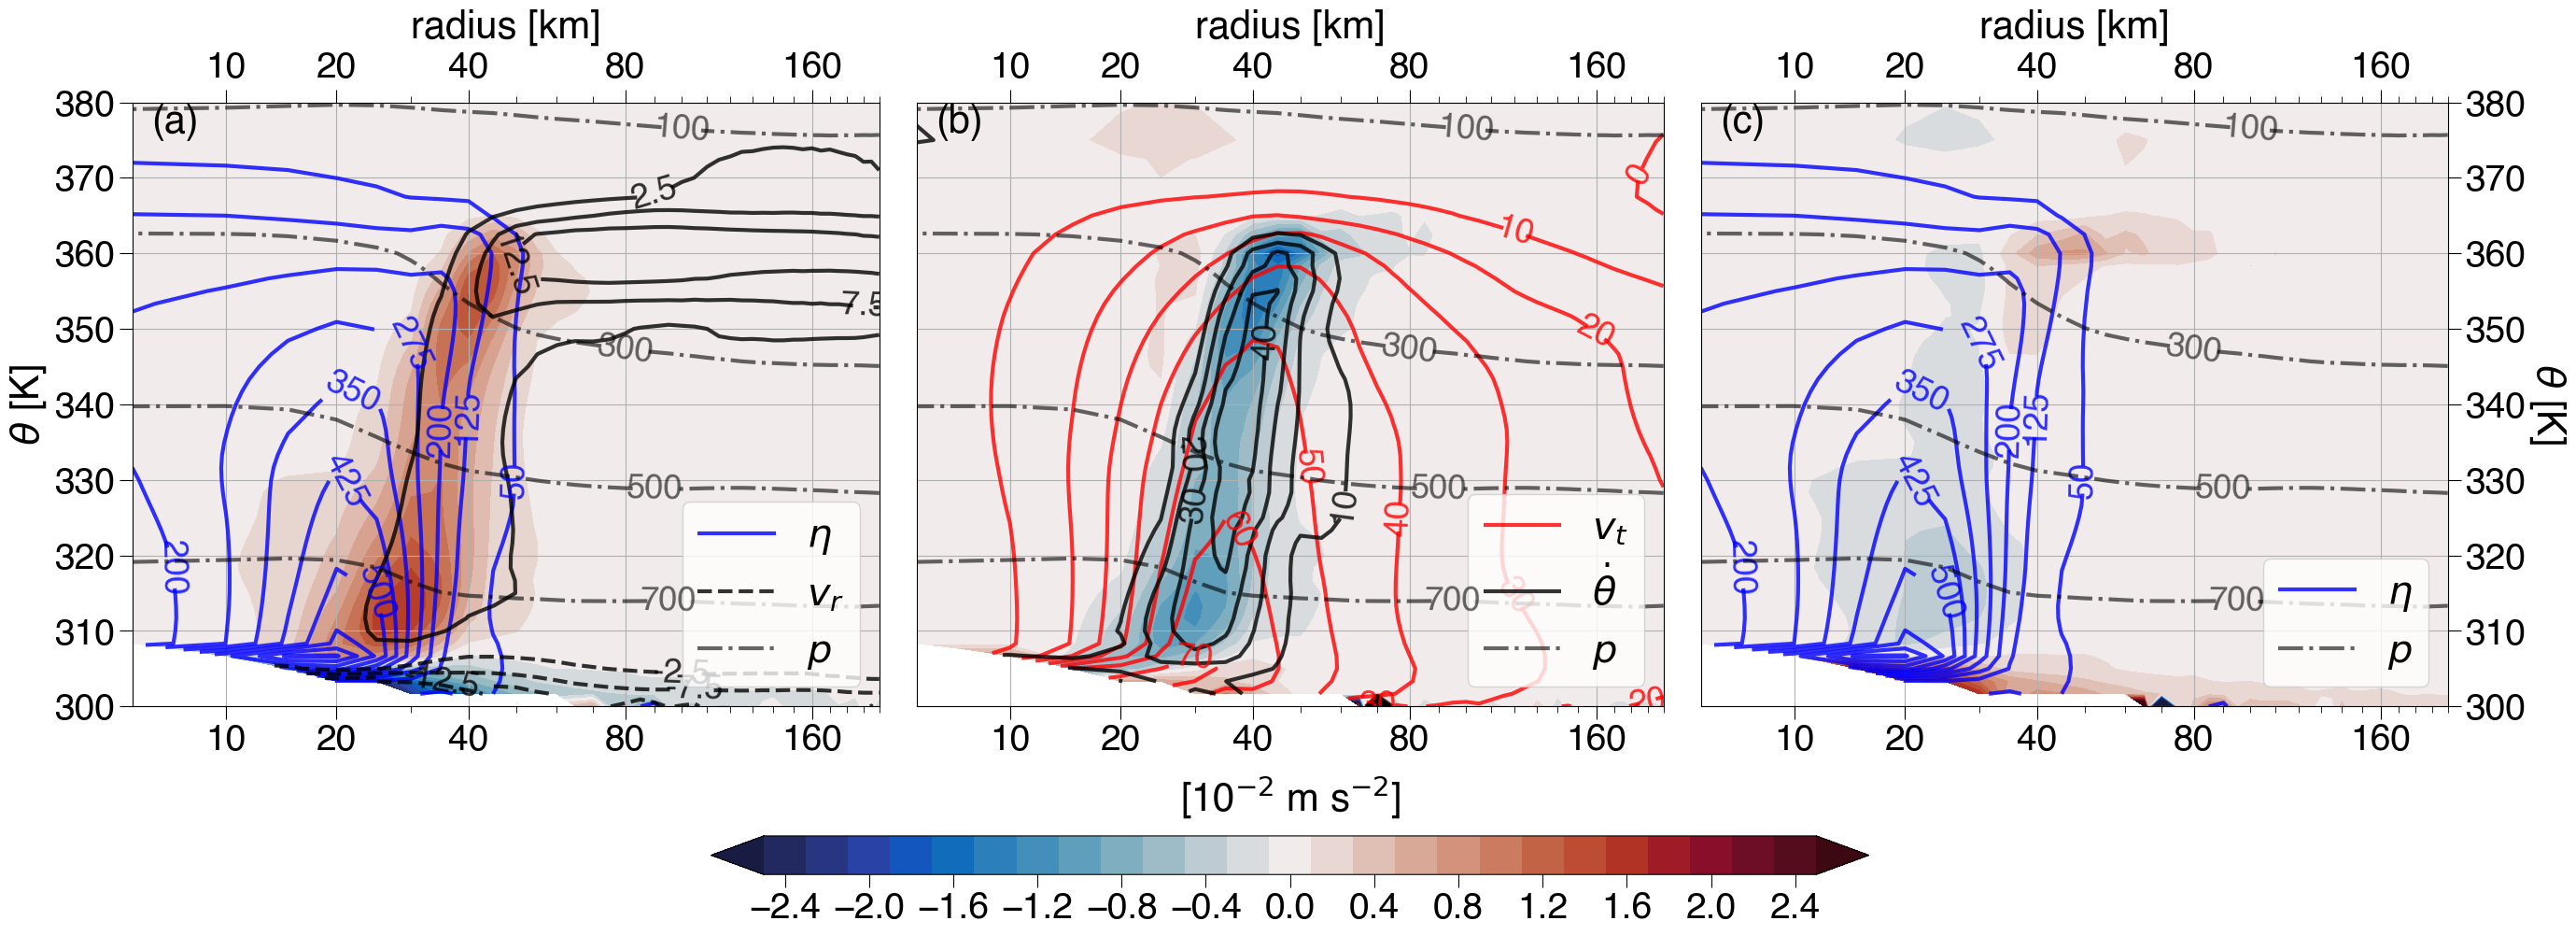

In [175]:
#------------------ general properties ------------------
xticks = np.array([10,20,40,80,160]) * 1000
xticklabels = ['10','20','40','80','160']
xticksminor = np.arange(10,201,10) * 1000
ticklabelsize = 28
ticklength = 10
minorticklength = 5
labelsize = 30
clabelsize = 26
linewidth = 3
Jlevels = np.arange(-2.5,2.51,0.2)
Jsumlevels = np.arange(-0.95,1.0, .1)
Vlevels = np.arange(0,80,10)
etalevels = [25,50,100,200,300,400,500,600,700,800]
etalevels = np.arange(50,801,75)
Ulevels = [-17.5,-12.5,-7.5,-2.5,2.5,7.5,12.5,17.5]
Plevels = np.array([100,300,500,700])

#------------------ create subplots ------------------
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(32,12))
ax1 = ax[0] # Advective plot
ax2 = ax[1] # Diabatic plot
ax3 = ax[2] # Tendency plot
plt.subplots_adjust(wspace=0.05, hspace=0.2)

#================== Plot 1 =======================
p1 = (dsls.Ja/1e-2).plot.contourf(ax=ax1, add_colorbar=False, levels=Jlevels, y='theta', cmap=cmocean.cm.balance)
p11 = (dsls.eta/1e-5).plot.contour(ax=ax1, levels=etalevels, y='theta', colors='b', alpha=0.8, linewidths=linewidth)
p12 = dsls.u_rad.plot.contour(ax=ax1, levels=Ulevels, y='theta', colors='k', alpha=0.8, linewidths=linewidth)
p13 = (dsls.pres/100).plot.contour(ax=ax1, levels=Plevels, y='theta', colors='k', zorder=5, linewidths=linewidth, alpha=0.6, linestyles='dashdot')
ax1.clabel(p11, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%d")
ax1.clabel(p12, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%0.1f")
ax1.clabel(p13,inline=True,inline_spacing=1,fontsize=clabelsize)
h11 = p11.legend_elements()[0][0]
h12 = p12.legend_elements()[0][0]
h13 = p13.legend_elements()[0][0]
ax1.legend(handles=[h11,h12,h13],labels=[r'$\eta$',r'$v_r$','$p$'],fontsize=labelsize,loc='lower right')

#================== Plot 2 =======================
p2 = (dsls.Jh/1e-2).plot.contourf(ax=ax2, add_colorbar=False, levels=Jlevels, y='theta', cmap=cmocean.cm.balance)
p21 = dsls.v_tan.plot.contour(ax=ax2, levels=Vlevels, y='theta', colors='r', alpha=0.8, linewidths=linewidth)
p22 = (dsls.heating*3600).plot.contour(ax=ax2, levels=np.arange(10,61,10), y='theta', colors='k', alpha=0.8, linewidths=linewidth)
p23 = (dsls.pres/100).plot.contour(ax=ax2, levels=Plevels, y='theta', colors='k', zorder=5, linewidths=linewidth, alpha=0.6, linestyles='dashdot')
ax2.clabel(p21, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%d")
ax2.clabel(p22, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%1.0f")
ax2.clabel(p23,inline=True,inline_spacing=1,fontsize=clabelsize)
h21 = p21.legend_elements()[0][0]
h22 = p22.legend_elements()[0][0]
h23 = p23.legend_elements()[0][0]
ax2.legend(handles=[h21,h22,h23],labels=[r'$v_t$',r'$\dot{\theta}$','$p$'],fontsize=labelsize,loc='lower right')

#================== Plot 3 =======================
p3 = (Jr/1e-2).plot.contourf(ax=ax3, add_colorbar=False, levels=Jlevels, y='theta', cmap=cmocean.cm.balance)
p31 = (dsls.eta/1e-5).plot.contour(ax=ax3, levels=etalevels, y='theta', colors='b', alpha=0.8, linewidths=linewidth)
p32 = (dsls.pres/100).plot.contour(ax=ax3, levels=Plevels, y='theta', colors='k', zorder=5, linewidths=linewidth, alpha=0.6, linestyles='dashdot')
ax3.clabel(p31,inline=True,inline_spacing=1,fontsize=clabelsize)
ax3.clabel(p32,inline=True,inline_spacing=1,fontsize=clabelsize)
h31 = p31.legend_elements()[0][0]
h32 = p32.legend_elements()[0][0]
ax3.legend(handles=[h31,h32],labels=['$\eta$','$p$'],fontsize=labelsize,loc='lower right')

#------------------ Colorbar ------------------
cb = fig.colorbar(p3, ax=ax, ticks=np.arange(-2.4, 2.41,0.4), orientation='horizontal', shrink=.5, aspect=30)

#------------------ ticks ------------------
ax1.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax2.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax3.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax1.set_xticks(xticks,labels=xticklabels)
ax2.set_xticks(xticks,labels=xticklabels)
ax3.set_xticks(xticks,labels=xticklabels)
ax1.set_xticks(xticksminor, minor=True)
ax2.set_xticks(xticksminor, minor=True)
ax3.set_xticks(xticksminor, minor=True)
cb.ax.minorticks_off()
#ax5.minorticks_off()
ax1.tick_params(labelbottom=True, labelright=False, labelleft=True,  labeltop=True,  top=True, labelsize=ticklabelsize, length=ticklength)
ax2.tick_params(labelbottom=True, labelright=False, labelleft=False, labeltop=True,  top=True, labelsize=ticklabelsize, length=ticklength, left=False)
ax3.tick_params(labelbottom=True, labelright=True,  labelleft=False, labeltop=True,  top=True, labelsize=ticklabelsize, length=ticklength, left=False, right=True)
cb.ax.tick_params(labelbottom=True, labelright=False, labelleft=False, labeltop=False, labelsize=ticklabelsize, length=ticklength)
#ax5.tick_params(labelbottom=True, labelright=False, labelleft=False, labeltop=False, labelsize=ticklabelsize, length=ticklength)
ax1.tick_params(axis='x', which='minor', top=True, length=minorticklength)
ax2.tick_params(axis='x', which='minor', top=True, length=minorticklength)
ax3.tick_params(axis='x', which='minor', top=True, length=minorticklength)


#------------------ axis labels ------------------
ax1.set_ylabel(r'$\theta$ [K]', fontsize=labelsize)
ax2.set_ylabel('', fontsize=labelsize)
ax3.set_ylabel(r'$\theta$ [K]', fontsize=labelsize, rotation=270, labelpad=labelsize+2)
ax3.yaxis.set_label_position("right")
ax1.set_xlabel('radius [km]', fontsize=labelsize, labelpad=10)
ax2.set_xlabel('radius [km]', fontsize=labelsize, labelpad=10)
ax3.set_xlabel('radius [km]', fontsize=labelsize, labelpad=10)
ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")
ax3.xaxis.set_label_position("top")

#------------------ axis titles ------------------
ax1.annotate('(a)',(0.025,0.95),xycoords='axes fraction', fontsize=labelsize)
ax2.annotate('(b)',(0.025,0.95),xycoords='axes fraction', fontsize=labelsize)
ax3.annotate('(c)',(0.025,0.95),xycoords='axes fraction', fontsize=labelsize)
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
cb.ax.set_title(r'[10$^{-2}$ m s$^{-2}$]', fontsize=labelsize, pad=20)
#ax5.set_title(r'$J_t$ [10$^{-3}$ m s$^{-2}$]', fontsize=labelsize, pad=20)

#------------------ grid lines ------------------
ax1.grid()
ax2.grid()
ax3.grid()

#------------------ white space ------------------

#fig.tight_layout()

#fig.suptitle('Components of isentropic vorticity flux'
#          +f'\n{str(dsl.valid_time.data[0])[:-13]}-{str(dsl.valid_time.data[-1])[-18:-13]}',fontsize=26)

#fig.savefig('lg2_J6.png',dpi=300,transparent=False, bbox_inches='tight',bbox_extra_artists=[leg1])
fig.savefig('fig06.pdf', format='pdf', dpi=300,transparent=False, bbox_inches='tight')

### Old versions

In [ ]:
rz_range = {'r':slice(5000,200000), 'z':slice(3,47)}

# calculations
ds['detadt'] = ds.eta.differentiate('valid_time', datetime_unit='s')
ds['heating'] = ds.cimf / ds.sigma
dsls = ds.mean('valid_time').astype('float64').sel(rz_range)
mask = dsls.Jh.isnull()
dsls = dsls.where(~mask, np.nan)

# general properties
xticks = np.array([10,20,40,80,160]) * 1000
xticklabels = ['10','20','40','80','160']
xticksminor = np.arange(10,201,10) * 1000
ticklabelsize = 28
ticklength = 10
minorticklength = 5
labelsize = 30
clabelsize = 26
linewidth = 2.5
Jlevels = np.arange(-2.5,2.51,0.2)
Jsumlevels = np.arange(-0.95,1.0, .1)
Vlevels = np.arange(0,80,10)
etalevels = [25,50,100,200,300,400,500,600,700,800]
etalevels = np.arange(50,801,75)
Ulevels = [-17.5,-12.5,-7.5,-2.5,2.5,7.5,12.5,17.5]
Plevels = np.array([100,300,500,700])

# create subplots
fig, ax = plt.subplots(ncols=3, nrows=2, height_ratios=[25,1], figsize=(32,12))
ax1 = ax[0,0] # Advective plot
ax2 = ax[0,1] # Diabatic plot
ax3 = ax[0,2] # Tendency plot
ax5 = ax[1,2] # Tendency colorbar
gs = ax[1, 2].get_gridspec()
for axi in ax[1, :2]:
    axi.remove()
ax4 = fig.add_subplot(gs[1, :2]) # colorbar advective + diabatic

# Plot 1
p1 = (dsls.Ja/1e-2).plot.contourf(ax=ax1, add_colorbar=False, levels=Jlevels, y='theta', cmap=cmocean.cm.balance)
p11 = (dsls.eta/1e-5).plot.contour(ax=ax1, levels=etalevels, y='theta', colors='b', alpha=0.8, linewidths=linewidth)
p12 = dsls.u_rad.plot.contour(ax=ax1, levels=Ulevels, y='theta', colors='k', alpha=0.8, linewidths=linewidth)
p13 = (dsls.pres/100).plot.contour(ax=ax1, levels=Plevels, y='theta', colors='k', zorder=5, linewidths=linewidth, alpha=0.6, linestyles='dashdot')
ax1.clabel(p11, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%d")
ax1.clabel(p12, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%0.1f")
ax1.clabel(p13,inline=True,inline_spacing=1,fontsize=clabelsize)

# Plot 2
p2 = (dsls.Jh/1e-2).plot.contourf(ax=ax2, add_colorbar=False, levels=Jlevels, y='theta', cmap=cmocean.cm.balance)
p21 = dsls.v_tan.plot.contour(ax=ax2, levels=Vlevels, y='theta', colors='r', alpha=0.8, linewidths=linewidth)
p22 = (dsls.heating*3600).plot.contour(ax=ax2, levels=np.arange(10,61,10), y='theta', colors='k', alpha=0.8, linewidths=linewidth)
p23 = (dsls.pres/100).plot.contour(ax=ax2, levels=Plevels, y='theta', colors='k', zorder=5, linewidths=linewidth, alpha=0.6, linestyles='dashdot')
ax2.clabel(p21, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%d")
ax2.clabel(p22, inline=True, inline_spacing=1, fontsize=clabelsize, fmt="%1.0f")
ax2.clabel(p23,inline=True,inline_spacing=1,fontsize=clabelsize)

# Plot 3
p4 = (dsls.Je/1e-3).plot.contourf(ax=ax3, add_colorbar=False, levels=np.arange(-1.3,1.31,0.2), y='theta', cmap=cmocean.cm.curl)
p41 = (dsls.pres/100).plot.contour(ax=ax3, levels=Plevels, y='theta', colors='k', zorder=5, linewidths=linewidth, alpha=0.6, linestyles='dashdot')
p42 = np.sqrt(dsls.l_sq.where(~dsls.Je.isnull(),np.nan)).plot.contour(ax=ax3, y='theta',levels=np.arange(0,1000,100),linewidths=linewidth, alpha=0.8, colors='k')
ax3.clabel(p41,inline=True,inline_spacing=1,fontsize=clabelsize)
ax3.clabel(p42,inline=True,inline_spacing=1,fontsize=clabelsize)

# Colorbars
cb1 = plt.colorbar(p1, cax=ax4, ticks=np.arange(-2.4, 2.41,0.4), orientation='horizontal')
cb2 = plt.colorbar(p4, cax=ax5, ticks=np.arange(-1.2,1.21,0.4), orientation='horizontal')

# ticks
ax1.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax2.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax3.set_xscale('function', functions=(lambda x: x**(1/4), lambda x: x**(4)))
ax1.set_xticks(xticks,labels=xticklabels)
ax2.set_xticks(xticks,labels=xticklabels)
ax3.set_xticks(xticks,labels=xticklabels)
ax1.set_xticks(xticksminor, minor=True)
ax2.set_xticks(xticksminor, minor=True)
ax3.set_xticks(xticksminor, minor=True)
ax4.minorticks_off()
ax5.minorticks_off()

# axis labels
ax1.set_ylabel('theta [K]', fontsize=labelsize)
ax2.set_ylabel('', fontsize=labelsize)
ax3.set_ylabel('theta [K]', fontsize=labelsize, rotation=270, labelpad=labelsize+2)
ax3.yaxis.set_label_position("right")
ax1.set_xlabel('radius [km]', fontsize=labelsize, labelpad=10)
ax2.set_xlabel('radius [km]', fontsize=labelsize, labelpad=10)
ax3.set_xlabel('radius [km]', fontsize=labelsize, labelpad=10)
ax1.xaxis.set_label_position("top")
ax2.xaxis.set_label_position("top")
ax3.xaxis.set_label_position("top")
ax1.tick_params(labelbottom=True, labelright=False, labelleft=True, labeltop=True, top=True, labelsize=ticklabelsize, length=ticklength)
ax2.tick_params(labelbottom=True, labelright=False, labelleft=False, labeltop=True, top=True, left=False, labelsize=ticklabelsize, length=ticklength)
ax3.tick_params(labelbottom=True, labelright=True, labelleft=False, labeltop=True, top=True, left=False, right=True, labelsize=ticklabelsize, length=ticklength)
ax4.tick_params(labelbottom=True, labelright=False, labelleft=False, labeltop=False, labelsize=ticklabelsize, length=ticklength)
ax5.tick_params(labelbottom=True, labelright=False, labelleft=False, labeltop=False, labelsize=ticklabelsize, length=ticklength)
ax1.tick_params(axis='x', which='minor', top=True, length=minorticklength)
ax2.tick_params(axis='x', which='minor', top=True, length=minorticklength)
ax3.tick_params(axis='x', which='minor', top=True, length=minorticklength)

# axis titles
ax1.annotate('(a)',(0.025,0.95),xycoords='axes fraction', fontsize=labelsize)
ax2.annotate('(b)',(0.025,0.95),xycoords='axes fraction', fontsize=labelsize)
ax3.annotate('(c)',(0.025,0.95),xycoords='axes fraction', fontsize=labelsize)
ax1.set_title('')
ax2.set_title('')
ax3.set_title('')
ax4.set_title(r'$\cdot10^{-2}ms^{-2}$', fontsize=labelsize, pad=-200)
ax5.set_title(r'$\cdot10^{-3}ms^{-2}$', fontsize=labelsize, pad=-20)

# grid lines
ax1.grid()
ax2.grid()
ax3.grid()

# white space
plt.subplots_adjust(wspace=0.05, hspace=0.2)
fig.tight_layout()

#fig.suptitle('Components of isentropic vorticity flux'
#          +f'\n{str(dsl.valid_time.data[0])[:-13]}-{str(dsl.valid_time.data[-1])[-18:-13]}',fontsize=26)

fig.savefig('fig/lg2_J4.png',dpi=300,transparent=False)